In [1]:
%matplotlib inline
import numpy as np
from topas2numpy import BinnedResult
import matplotlib.pyplot as plt

from pylab import rcParams
rcParams.update({
        'figure.figsize': (10.0, 8.0),
        'font.size': 18,
    })

from glob import iglob as glob
from os.path import basename

(0, 10)

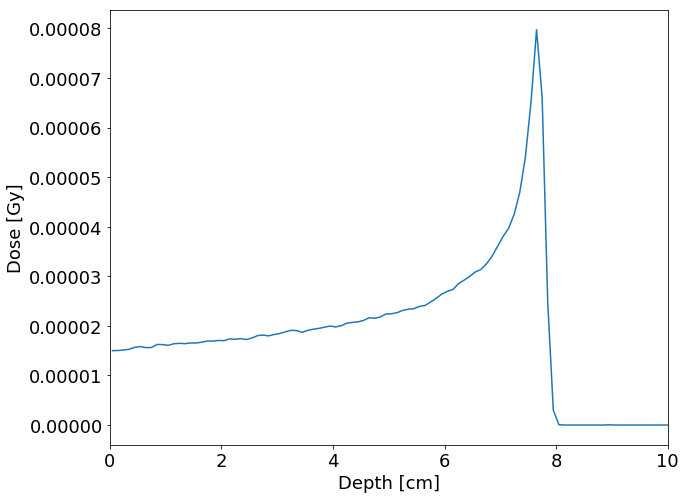

In [2]:
dose = BinnedResult('results/PhysicalDose.csv')

z = dose.dimensions[2].get_bin_centers()
D = np.squeeze(dose.data['Sum'])

plt.plot(z, D)
plt.xlabel('Depth [cm]')
plt.ylabel('Dose [Gy]')
plt.xlim((0,10))

(0, 10)

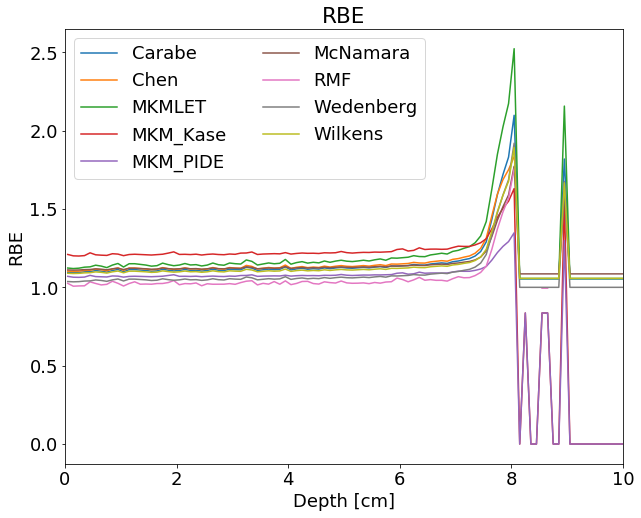

In [3]:
quantity = 'RBE'

fname_suffix = '_' + quantity + '.csv'
scorers = {basename(fname)[:-len(fname_suffix)]: BinnedResult(fname) for fname in glob('results/*'+fname_suffix)}

z = next(iter(scorers.values())).dimensions[2].get_bin_centers()
for k,v in sorted(scorers.items()):
    y = np.squeeze(v.data['Sum'])
    plt.plot(z, y, label=k)

plt.title(quantity)
plt.xlabel('Depth [cm]')
plt.ylabel(quantity)
plt.legend(loc='best', ncol=2)
# plt.yscale('log')
plt.xlim((0,10))